In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re
from sklearn.svm import SVC
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
mat=loadmat("data_pulso1.mat")
X=mat["Xtrain"]
y=mat["ytrain"]

Xtest=mat["Xtest"]
ytest=mat["ytest"]

m = len(y)
mtest = len(ytest)
print(m)
print(mtest)

print(y.shape)
print(X.shape)
print(ytest.shape)
print(Xtest.shape)

1369
599
(1369, 1)
(1369, 15)
(599, 1)
(599, 15)


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Xtest = scaler.fit_transform(Xtest)

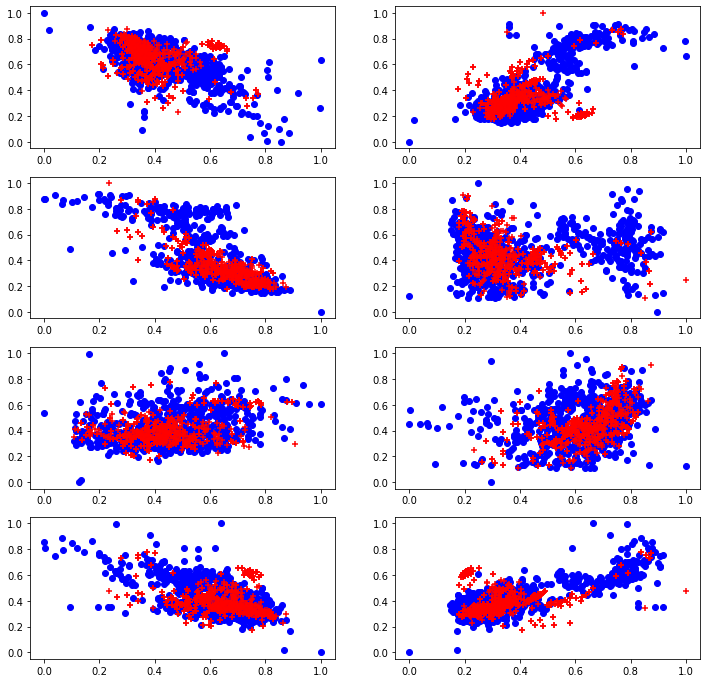

In [4]:
pos=(y==1)
neg=(y==0)
fig, axes = plt.subplots(figsize=(12,12),nrows=4,ncols=2)

axes[0,0].scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
axes[0,0].scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")

axes[0,1].scatter(X[neg[:,0],0],X[neg[:,0],2],c="b",marker="o")
axes[0,1].scatter(X[pos[:,0],0],X[pos[:,0],2],c="r",marker="+")

axes[1,0].scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="o")
axes[1,0].scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")

axes[1,1].scatter(X[neg[:,0],2],X[neg[:,0],3],c="b",marker="o")
axes[1,1].scatter(X[pos[:,0],2],X[pos[:,0],3],c="r",marker="+")

axes[2,0].scatter(X[neg[:,0],3],X[neg[:,0],4],c="b",marker="o")
axes[2,0].scatter(X[pos[:,0],3],X[pos[:,0],4],c="r",marker="+")

axes[2,1].scatter(X[neg[:,0],1],X[neg[:,0],3],c="b",marker="o")
axes[2,1].scatter(X[pos[:,0],1],X[pos[:,0],3],c="r",marker="+")

axes[3,0].scatter(X[neg[:,0],1],X[neg[:,0],4],c="b",marker="o")
axes[3,0].scatter(X[pos[:,0],1],X[pos[:,0],4],c="r",marker="+")

axes[3,1].scatter(X[neg[:,0],2],X[neg[:,0],4],c="b",marker="o")
axes[3,1].scatter(X[pos[:,0],2],X[pos[:,0],4],c="r",marker="+")


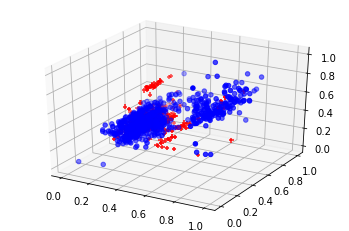

In [5]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

#fig, axes = plt.subplots(figsize=(12,12),nrows=4,ncols=2)

ax.scatter(X[neg[:,0],2],X[neg[:,0],3],X[neg[:,0],4],c="b",marker="o")
ax.scatter(X[pos[:,0],2],X[pos[:,0],3],X[pos[:,0],4],c="r",marker="+")



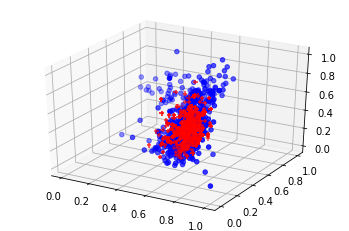

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[pos[:,0],1],X[pos[:,0],2],X[pos[:,0],3],c="r",marker="+")
ax.scatter(X[neg[:,0],1],X[neg[:,0],2],X[neg[:,0],3],c="b",marker="o")

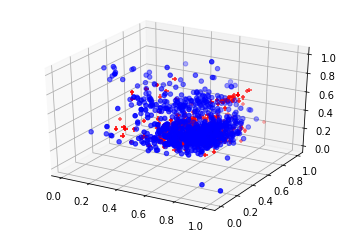

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[neg[:,0],1],X[neg[:,0],3],X[neg[:,0],4],c="b",marker="o")
ax.scatter(X[pos[:,0],1],X[pos[:,0],3],X[pos[:,0],4],c="r",marker="+")


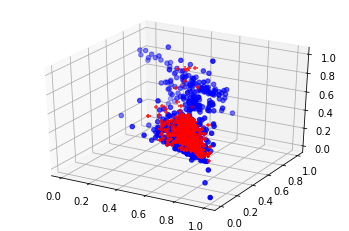

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[neg[:,0],1],X[neg[:,0],2],X[neg[:,0],4],c="b",marker="o")
ax.scatter(X[pos[:,0],1],X[pos[:,0],2],X[pos[:,0],4],c="r",marker="+")

In [22]:
param_grid=[{'kernel': ['rbf'], 'gamma':  np.arange(0.1,10,0.198),
                     'C': np.arange(0.1,10,0.198)},
                    {'kernel': ['linear'], 'C': np.arange(0.1,10,0.198)}]
#50 pontos
adv_svr_fine = GridSearchCV(SVC(),param_grid)

In [23]:
adv_svr_fine.fit(X,y.ravel())

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(adv_svr_fine.cv_results_)

In [45]:

best_par = adv_svr_fine.best_estimator_.get_params()
print(best_par['C'])
print(best_par['gamma'])

best_C=best_par['C']
best_gamma=best_par['gamma']

print(best_C)
print(best_gamma)

0.1
5.446000000000001
0.1
5.446000000000001


In [51]:
param_grid1=[{'kernel': ['linear'], 'C': np.arange(0.1,10,0.198)}]
#50 pontos
adv_svr_fine1 = GridSearchCV(SVC(),param_grid1)

In [52]:
adv_svr_fine1.fit(X,y.ravel())

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'kernel': ['linear']}])

In [53]:
pd.DataFrame(adv_svr_fine1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010278,0.002825,0.001995,6.307512e-04,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
1,0.008653,0.004054,0.000798,9.773305e-04,0.298,linear,"{'C': 0.29800000000000004, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
2,0.009802,0.000398,0.000000,0.000000e+00,0.496,linear,"{'C': 0.4960000000000001, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
3,0.010002,0.000004,0.000000,0.000000e+00,0.694,linear,"{'C': 0.6940000000000001, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
4,0.009367,0.001389,0.000000,0.000000e+00,0.892,linear,"{'C': 0.8920000000000001, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
5,0.009689,0.005757,0.002022,3.124958e-03,1.09,linear,"{'C': 1.0900000000000003, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
6,0.013888,0.005468,0.000814,7.616330e-04,1.288,linear,"{'C': 1.2880000000000003, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
7,0.014001,0.008697,0.001434,2.372564e-03,1.486,linear,"{'C': 1.4860000000000004, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
8,0.022345,0.010353,0.002013,3.130889e-03,1.684,linear,"{'C': 1.6840000000000004, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1
9,0.031566,0.008968,0.001199,3.979157e-04,1.882,linear,"{'C': 1.8820000000000003, 'kernel': 'linear'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,1


In [54]:
best_par1 = adv_svr_fine1.best_estimator_.get_params()
print(best_par1['C'])

0.1


In [56]:
param_grid2=[{'kernel': ['rbf'], 'gamma':  np.arange(0.1,10,0.198),
                     'C': np.arange(0.1,10,0.198)}]
#50 pontos
adv_svr_fine2 = GridSearchCV(SVC(),param_grid2)

In [57]:
adv_svr_fine2.fit(X,y.ravel())

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'gamma': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'kernel': ['rbf']}])

In [58]:
pd.DataFrame(adv_svr_fine2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018358,0.002616,0.002587,0.002141,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,343
1,0.020259,0.000500,0.001618,0.003235,0.1,0.298,rbf,"{'C': 0.1, 'gamma': 0.29800000000000004, 'kern...",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,343
2,0.014270,0.004275,0.006138,0.004277,0.1,0.496,rbf,"{'C': 0.1, 'gamma': 0.4960000000000001, 'kerne...",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,343
3,0.018835,0.003257,0.003243,0.003972,0.1,0.694,rbf,"{'C': 0.1, 'gamma': 0.6940000000000001, 'kerne...",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,343
4,0.017669,0.002868,0.003068,0.003720,0.1,0.892,rbf,"{'C': 0.1, 'gamma': 0.8920000000000001, 'kerne...",0.686131,0.686131,0.684982,0.684982,0.684982,0.685442,0.000563,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.022381,0.004007,0.003941,0.004281,9.802,9.01,rbf,"{'C': 9.802000000000001, 'gamma': 9.0100000000...",0.645985,0.496350,0.589744,0.637363,0.721612,0.618211,0.074149,1804
2496,0.021527,0.001457,0.003625,0.003754,9.802,9.208,rbf,"{'C': 9.802000000000001, 'gamma': 9.2080000000...",0.642336,0.496350,0.593407,0.641026,0.721612,0.618946,0.073833,1739
2497,0.022255,0.003165,0.002435,0.002961,9.802,9.406,rbf,"{'C': 9.802000000000001, 'gamma': 9.406, 'kern...",0.645985,0.492701,0.593407,0.644689,0.721612,0.619679,0.075527,1673
2498,0.020661,0.000780,0.005675,0.004696,9.802,9.604,rbf,"{'C': 9.802000000000001, 'gamma': 9.6040000000...",0.649635,0.492701,0.586081,0.644689,0.721612,0.618943,0.076371,1750


In [59]:
best_par2 = adv_svr_fine2.best_estimator_.get_params()
print(best_par2['C'])
print(best_par2['gamma'])

0.1
5.446000000000001


In [67]:
from sklearn.metrics import f1_score
classifier1 = SVC(kernel="linear",C=0.1)
classifier1.fit(X,y.ravel())
prediction1 = classifier1.predict(Xtest)

# Accuracy
print(classifier1.score(X,y)) 
print(classifier1.score(Xtest,ytest))

#F1 score
print(f1_score(ytest,prediction1)) 

0.6854425749817118
0.6927536231884058
0.0


In [68]:
from sklearn.metrics import average_precision_score

y_score1 = classifier1.decision_function(Xtest)
average_precision1 = average_precision_score(ytest, y_score1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision1))

Average precision-recall score: 0.43


In [1]:
classifier2 = SVC(kernel="rbf",C=0.1, gamma=5.4)
classifier2.fit(X,y.ravel())
prediction2 = classifier2.predict(Xtest)

# Accuracy
print(classifier2.score(X,y)) 
print(classifier2.score(Xtest,ytest))

#F1 score
print(f1_score(ytest,prediction2)) 

NameError: name 'SVC' is not defined

In [70]:
y_score2 = classifier2.decision_function(Xtest)
average_precision2 = average_precision_score(ytest, y_score2)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision2))

Average precision-recall score: 0.22


-------------------------------------------------------------------------------------------------------------------------------

In [9]:
def dataset3Params_rbf(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(kernel="rbf",C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [10]:
vals = [0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]
best_C, best_gamma = dataset3Params_rbf(X, y.ravel(), Xtest, ytest.ravel(),vals)

print('Best C:', best_C)
print('Best gamma:', best_gamma)
print('Best sigma:', 1/best_gamma)

classifier4 = SVC(C=best_C,gamma=best_gamma)
classifier4.fit(X,y.ravel())

print(classifier4.score(X,y))
print(classifier4.score(Xtest,ytest))


Best C: 0.1
Best gamma: 0.12468827930174564
Best sigma: 8.02
0.7662527392257122
0.8263772954924875


[[325  80]
 [ 24 170]]
[[619 152]
 [168 430]]


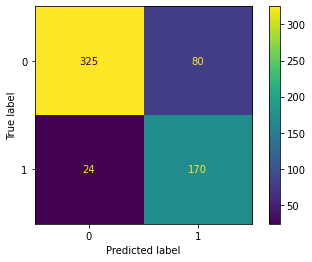

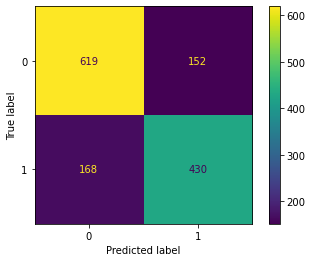

In [11]:
from sklearn.metrics import plot_confusion_matrix

disp1=plot_confusion_matrix(classifier4,Xtest,ytest)
print(disp1.confusion_matrix)

disp2=plot_confusion_matrix(classifier4,X,y)
print(disp2.confusion_matrix)

In [15]:
def dataset3Params_linear(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_C=0
    for i in vals:
        C= i
        classifier = SVC(kernel="linear",C=C)
        classifier.fit(X,y)
        prediction = classifier.predict(Xval)
        score = classifier.score(Xval,yval)
        if score>acc:
            acc =score
            best_C =C                
    return best_C

In [17]:
vals = [0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]
best_C= dataset3Params_linear(X, y.ravel(), Xtest, ytest.ravel(),vals)

print('Best C:', best_C)

classifier5= SVC(C=best_C)
classifier5.fit(X,y.ravel())

print(classifier5.score(X,y))
print(classifier5.score(Xtest,ytest))

Best C: 1.09
0.8918918918918919
0.7111853088480802


[[325  80]
 [ 24 170]]
[[619 152]
 [168 430]]


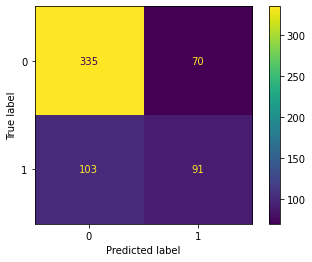

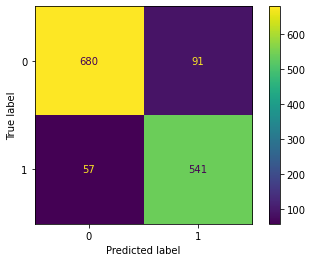

In [18]:
disp3=plot_confusion_matrix(classifier5,Xtest,ytest)
print(disp1.confusion_matrix)

disp4=plot_confusion_matrix(classifier5,X,y)
print(disp2.confusion_matrix)